In [1]:
import argparse
import datetime
import glob
import os.path
import backtrader as bt
import boto3
import io
import pandas as pd


import btoandav20
import pytz

import q_datafeeds.bt_datafeed_postgres as bt_datafeed_postgres
from q_strategies import *
import q_credentials.oanda_cred as oanda_cred
import q_credentials.db_secmaster_cred as db_cred
# import q_credentials.db_secmaster_cred as db_cred
import q_analyzers.bt_strat_perform_analyzer as bt_strat_performance_analyzer
import q_analyzers.bt_pos_perform_analyzer as bt_pos_performance_analyzer
import q_analyzers.bt_transaction_analyzer as bt_trans_analyzer
import q_analyzers.bt_strategy_id_analyzer as bt_strategy_id_analyzer
# import q_analyzers.bt_logger_analyzer as bt_logger_analyzer
import q_analyzers.bt_logger_analyzer as bt_logger_analyzer
import q_tools.args_parse_other as args_parse_other
import q_analyzers.bt_indicator_analyzer as bt_indicator_analyzer

In [2]:
# %matplotlib notebook 

# %matplotlib widget
# from matplotlib import pyplot

In [3]:
# from matplotlib import pyplot as plt
import matplotlib
matplotlib.use('agg')
# %matplotlib inline

In [4]:
# fig=plt.figure(figsize=(18, 16))

In [5]:
cerebro = bt.Cerebro()

In [6]:
s3 = boto3.client('s3',endpoint_url="http://minio-image:9000",aws_access_key_id="minio-image",aws_secret_access_key="minio-image-pass")
Bucket="airflow-files"
Key="interested_tickers_alpaca.xlsx"
read_file = s3.get_object(Bucket=Bucket, Key=Key)
df = pd.read_excel(io.BytesIO(read_file['Body'].read()),sep=',',sheet_name="daily")
ticker_list = list(df['Tickers'])

In [7]:
ticker_list=ticker_list[:3]

In [8]:
for ticker in ticker_list:
    data = bt_datafeed_postgres.PostgreSQL_Daily(dbHost=db_cred.dbHost,dbUser=db_cred.dbUser,dbPWD=db_cred.dbPWD,dbName=db_cred.dbName,ticker=ticker, name=ticker)
    cerebro.adddata(data)
cerebro.broker.setcash(10000)

In [9]:
cerebro.addstrategy(simple_strategy.St)

0

In [10]:
results = cerebro.run(tradehistory=True)  

Strategy run finished with Run ID: None


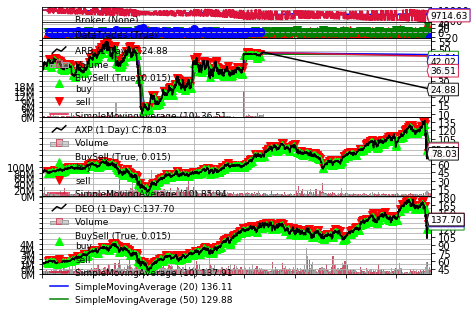

[[<Figure size 432x288 with 8 Axes>]]

In [13]:
cerebro.plot(iplot=False)

In [12]:
%matplotlib inline